This project is for the class of OPS802. The target of the project is to have a hands on full data analytics experience from A to Z. That means starting with raw data and reading it into python then doing some analytical and statstical observations on the data and finally doing some supervised and unsupervised learning on the data. The data we will use for this project is one of the most famous datasets in the machine learning world which is called IRIS classification dataset. That means there is plenty of resources for you online to learn from and that you are not the first person who saw and analyzed this data. Use this to your advantage. The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper "The use of multiple measurements in taxonomic problems" as an example of linear discriminant analysis. We will describe it more in details later. The project measures the capabilities of lodaing data, cleaning it up, running some tests and statistical analysis and finally machine learning. The following highlights the project
-  The project consists of four parts, they are mostly independent and in order based on what we studies in class
-  The deadline of the project is the last day of the quarter
-  The project is individual, however I encourage you to talk to each other to check your different approaches without copying codes or talking about detailed code specific. For example, it is ok to ask about which function you have used to tackle part a and is it better than this other function or not. It is not ok to copy the exact code including that function you asked about.
- You are expected to heavily utilize resources outside the class notebooks such as Google, StackOverflow, .. etc
- Code cleanings and Display has 10% of the grade

# Part1: Data Loading and Cleaning up
The iris flower dataset consists of 150 collected observations for different flower's charachteristics. The dataset contains four attributes. These four attributes help decide which Iris class does the flower belong to. The four attributes are sepal length, sepal width, petal length, and petal width; all in cm. The data set contains 3 classes Iris Setosa, Iris Versicolour, and Iris Virginica. For more info about the dataset, you can chek [this link](https://en.wikipedia.org/wiki/Iris_flower_data_set). The end target of the project will be to build a model that can predict, based on the four attributes, which class does the flower belong to.

In the first part of the project we will start by loading the data and cleaning up any problems within the data. 

- load the Iris dataset using the file iris.data. You can open it with any text editor to find out how it looks like. Decide which separator you would like to use and if any rows needs to be skipped
<br>
Now let's do some exploring
- How many rows and colums are in the file
- How many nulls in the file
- Which rows contains nans and how many nans in each of these rows
- How many nans per columns?
- The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" based on the original paper. Is that what you have? If not, fix it
- The 39th sample: 4.9,3.6,1.4,0.1,"Iris-setosa",  where the errors are in the second and third features. Fix it

In [2]:
# Solve Here
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np


#load the Iris dataset and name it with five columns 
iris = pd.read_csv('iris_not_clean.data',sep = '|',skiprows = [1,34], names = ['sepal length', 'sepal width', 'petal length', 'petal width','species'])
iris. head()

#how many rows and colums are in the file
#show the total numbers of rows and columns using shape function
print ('there are', iris.shape, 'rows and columns') 

#how many nulls in the file
#use isnull and sum function to find the total of nulls 
print ('there are total of null', iris.isnull ().sum().sum(), 'in the iris file')

#which rows contains nans and how many nans in each of these rows
#isna and any function dectet nans (True) in row 
iris[iris.isna().any(axis=1)]

#how many nans per columns?
print ('Nans in each columns:')
iris.isna().sum()  

#the 36th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" based on the original paper.
#use loc function to access the 36th rows  
iris.loc[35]
# then fix petal width to 0.2 instead of 0.1
iris['petal width'].loc[35] = 0.2 
iris.loc[35]

#The 39th sample: 4.9,3.6,1.4,0.1,"Iris-setosa"
#use access 39th rows and fix the numbers 
iris.loc[38]
iris['sepal width'].loc[38] = 3.6
iris['petal length'].loc[38] = 1.4
iris.loc[38]



,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


there are (153, 5) rows and columns
there are total of null 9 in the iris file


,sepal length,sepal width,petal length,petal width,species
28,5.2,3.4,NaN,0.2,Iris-setosa
29,NaN,NaN,NaN,NaN,NaN
44,NaN,3.2,2.1,NaN,NaN


Nans in each columns:


sepal length    2
sepal width     1
petal length    2
petal width     2
species         2
dtype: int64

sepal length            4.9
sepal width             3.1
petal length            1.5
petal width             0.1
species         Iris-setosa
Name: 35, dtype: object

C:\Users\lawre\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


sepal length            4.9
sepal width             3.1
petal length            1.5
petal width             0.2
species         Iris-setosa
Name: 35, dtype: object

sepal length            4.9
sepal width             3.1
petal length            1.5
petal width             0.1
species         Iris-setosa
Name: 38, dtype: object

sepal length            4.9
sepal width             3.6
petal length            1.4
petal width             0.1
species         Iris-setosa
Name: 38, dtype: object

# Part 2: Stastical Exploring
In this part we will understand a little more about the data and do some cool plottings
- What is the mean and variance for each column and use the function describe to get insights about the data
- Drop the nan rows
- Recaluclate the mean and variance for each column
- What is the correlation between the fourth column and each of the other three columns individually? Any observations
- How many records exist for each class. # Hint, you can do this in one line by using groupby
- Change the random seed to 1234 and randomly pick 20 samples of the data and display it
- Plot histogram for all the data attributes
- Plot histogram for all the data attributes per feature, i.e. grouped by features

,sepal length,sepal width,petal length,petal width
count,151.000000,152.000000,151.000000,151.000000
mean,5.833775,3.060526,3.746358,1.192715
std,0.833618,0.434011,1.765475,0.764033
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.325000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Variance for each column


sepal length    0.694918
sepal width     0.188365
petal length    3.116903
petal width     0.583747
dtype: float64

Mean for each column


sepal length    5.833775
sepal width     3.060526
petal length    3.746358
petal width     1.192715
dtype: float64

sepal length    0
sepal width     0
petal length    0
petal width     0
species         0
dtype: int64

(150, 5)

New Variance for each column after drop nan rows


sepal length    0.696868
sepal width     0.189979
petal length    3.119510
petal width     0.581006
dtype: float64

New Mean for each column after drop nan rows


sepal length    5.838000
sepal width     3.057333
petal length    3.757333
petal width     1.199333
dtype: float64

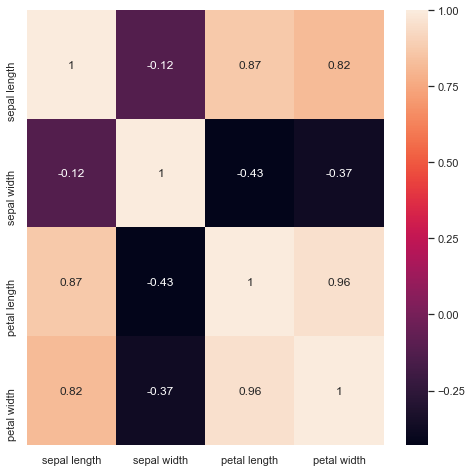

In [240]:
# Solve Here

import seaborn as sns
np.random.seed(1234)
import matplotlib.pyplot as plt
%matplotlib inline

#What is the mean and variance for each column using describe fuction
iris.describe()
print ('Variance for each column')
iris.var ()
print ('Mean for each column')
iris.mean()

#Drop the nan rows
#drop all the rows with nans with dropna,and ensure no nans by shape 
iris1=iris.dropna()
iris1.isnull().sum()
iris1.shape

#Recaluclate the mean and variance for each column
print ('New Variance for each column after drop nan rows')
iris1.var()
print ('New Mean for each column after drop nan rows')
iris1.mean()

#What is the correlation between the fourth column and each of the other 
# three columns individually? Any observations
sns.set(font_scale=1,rc={'figure.figsize':(8,8)})
correlation_matrix = iris1.corr().round(2)
sns.heatmap(data=correlation_matrix, annot = True)
#the heatmap shows the correlations of petal width and other three: 
# 0.82 is high positive correlation with sepal length 
# -0.37 is low negative correlation with sepal width 
# 0.96 is high positive correlation with petal length 


,sepal length,sepal width,petal length,petal width
species,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


,sepal length,sepal width,petal length,petal width,species
2,4.7,3.2,1.3,0.2,Iris-setosa
125,7.7,2.8,6.7,2.0,Iris-virginica
144,6.9,3.1,5.1,2.3,Iris-virginica
22,4.6,3.6,1.0,0.2,Iris-setosa
48,5.1,3.8,1.6,0.2,Iris-setosa
67,5.6,2.9,3.6,1.3,Iris-versicolor
81,6.0,2.9,4.5,1.5,Iris-versicolor
84,5.5,2.4,3.7,1.0,Iris-versicolor
128,7.2,3.2,6.0,1.8,Iris-virginica
99,5.7,2.9,4.2,1.3,Iris-versicolor


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026BECF17278>,
      dtype=object)

------------------------------------------------


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026BEAC83B38>,
      dtype=object)

------------------------------------------------


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026BEC7745F8>,
      dtype=object)

------------------------------------------------


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026BED42C588>,
      dtype=object)

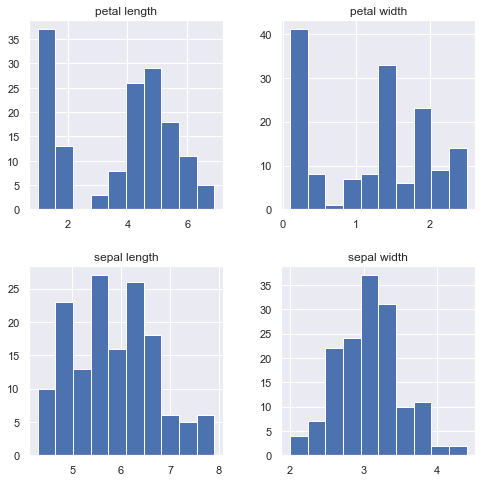

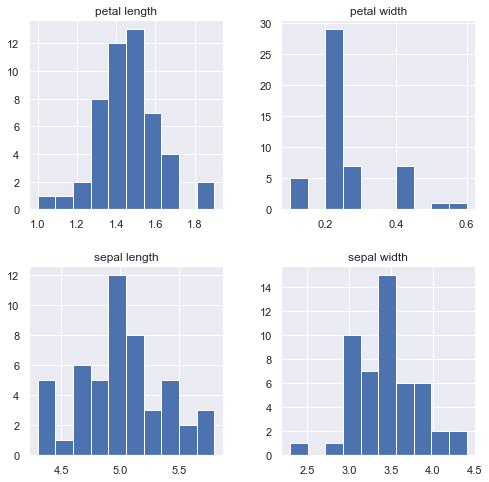

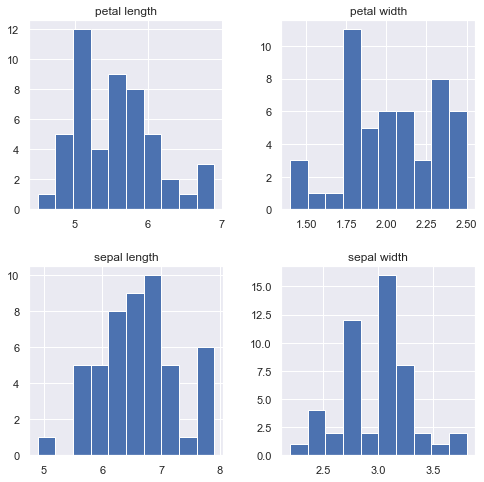

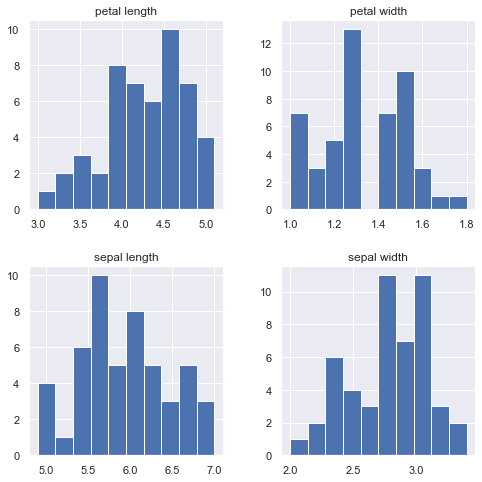

In [251]:
#How many records exist for each class
#use groupby function split the species and count each one
iris1.groupby('species').count()

#Change the random seed to 1234 and randomly pick 20 samples of the data and display it
#display random 20 samples
iris1.sample(20)

#Plot histogram for all the data attributes
iris1.hist()

#Plot histogram for all the data attributes per feature, i.e. grouped by features
print ('------------------------------------------------')
iris1_setosa = iris1.copy()
new_setosa = iris1_setosa["species"]=='Iris-setosa'
iris1_setosa.where(new_setosa, inplace = True)
iris1_setosa.hist()

print ('------------------------------------------------')
iris1_virginica = iris1.copy()
new_virginica = iris1_virginica["species"]=='Iris-virginica'
iris1_virginica.where(new_virginica, inplace = True)
iris1_virginica.hist()

print ('------------------------------------------------')
iris1_versicolor = iris1.copy()
new_versicolor = iris1_versicolor["species"]=='Iris-versicolor'
iris1_versicolor.where(new_versicolor, inplace = True)
iris1_versicolor.hist()



# Part 3: Statistical Analysis 
In this part, you will explore some curve fitting and dimensionality reductions attributes


- Use Scipy pdf fitting to do a curve fitting for the petal-length
- Plot the normalized histogrm of the petal-length and the estimated pdf on the same figure
- Generate new 500 samples using the estimated pdf for the petal-length 
- Calculate the mean of the new samples and compare how close it is to the mean of the given data

(array([22.73877347,  3.10074184,  0.        ,  3.10074184,  8.78543521,
        16.02049949, 10.85259643,  9.81901582,  3.10074184]),
 array([0.01967818, 0.03257832, 0.04547846, 0.05837859, 0.07127873,
        0.08417887, 0.09707901, 0.10997915, 0.12287929, 0.13577943]),
 <a list of 9 Patch objects>)

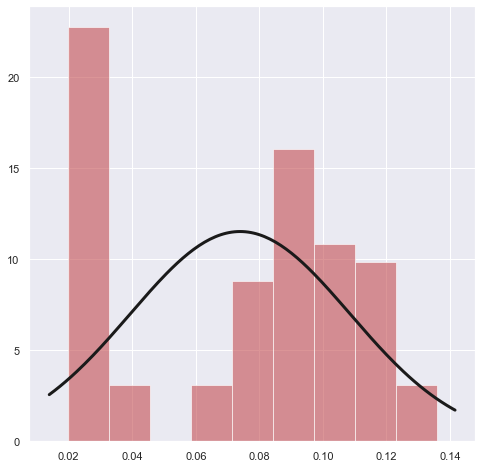

7.259824273271624 is the mean of the new 500 sampling
7.271903529901395  is the mean of the PDF 
0.017647708532579465 is the difference between mean of PDF and the new 500 samples


In [143]:
# Solve Here
from scipy.stats import norm
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.optimize import curve_fit 
import random

#Use Scipy pdf fitting to do a curve fitting for the petal-length
#create a new pandas dataframe and normalize it 
petal_length = pd.DataFrame(iris1['petal length'].copy())
new_array = np.array(petal_length['petal length'])
normalized_iris1 = preprocessing.normalize([new_array])
f,data=norm.fit(transposed_norm)

#Plot the normalized histogrm of the petal-length and the estimated pdf on the same figure
#histogram and PDF
plt.hist(transposed_norm, bins="auto", density=True, alpha=0.6, color='r')
xmin, xmax = plt.xlim()
a = np.linspace(xmin, xmax, 150)
b = norm.pdf(x, f,data) 
plt.plot(a, b, 'k', linewidth=3)
plt.show()

#Generate new 500 samples using the estimated pdf for the petal-length
samples = random.choices(b,k=500)

#Calculate the mean of the new samples and compare how close it is to the mean of the given data
new_samples  = np.array(samples)
print(new_samples.mean(), 'is the mean of the new 500 sampling')
print(b.mean(), ' is the mean of the PDF ')
print(abs(new_sampling.mean()-b.mean()), 'is the difference between mean of PDF and the new 500 samples' )


### PCA
- Use Scikit to do PCA on the IRIS dataset
- do a bar plot that shows the importance of info in each of the new dimensions
- use PCA to reduce the number of attributes by 1. Note that for all the next parts, you will use the reduced data

<BarContainer object of 4 artists>

<function matplotlib.pyplot.title(label, fontdict=None, loc='center', pad=None, **kwargs)>

<function matplotlib.pyplot.ylabel(ylabel, fontdict=None, labelpad=None, **kwargs)>

(112, 3)

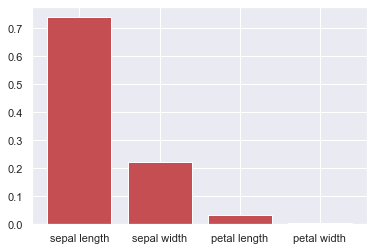

In [227]:
# Solve Here

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#Use Scikit to do PCA on the IRIS dataset
#Create a empty model 
iris_PCA = iris1.copy()

#drop the cathgorical column
X= iris_PCA.drop('species',1) 
y= iris_PCA['species']

#split the data into training and test set and normalized it
X_train, X_test, y_train, y_test = train_test_split(X, y) 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_ 

#do a bar plot that shows the importance of info in each of the new dimensions
x= ['sepal length','sepal width','petal length','petal width']
y = explained_variance
plt.bar(x,y, color='r')
plt.title
plt.ylabel

#use PCA to reduce the number of attributes by 1
pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X_train.shape


# Part 4: Machine Learning
In this part, you will explore the use of supervised and non supervised learning

### Non-Supervised Learning 
- using Kmeans, divide the data into different clusters. The number of clusters should be the same as the number of categories you have in the data
- Do scatter plot for each two combination of the three dimensions together (0 vs 1), (0 vs 2), (1 vs 2). Use the kmeans labels to color the points in the scatter plots

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

array([[ 1.80578716,  0.6858375 , -0.03574749],
       [-2.1152995 ,  0.25024915, -0.00894102],
       [ 0.76869694, -0.78802945,  0.03686885]])

array([2, 1, 0, 1, 0, 2, 2, 1, 2, 2, 0, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 0,
       0, 1, 2, 2, 1, 0, 1, 2, 0, 0, 1, 2, 2, 0, 1, 2, 1, 0, 2, 2, 0, 0,
       2, 1, 2, 2, 2, 0, 2, 1, 2, 0, 1, 2, 2, 2, 1, 1, 2, 0, 1, 2, 2, 1,
       0, 0, 2, 1, 1, 1, 1, 2, 1, 1, 0, 0, 0, 1, 2, 0, 2, 0, 0, 2, 2, 1,
       1, 1, 0, 2, 1, 0, 2, 1, 2, 2, 1, 1, 1, 0, 2, 1, 0, 0, 0, 0, 0, 2,
       1, 1])

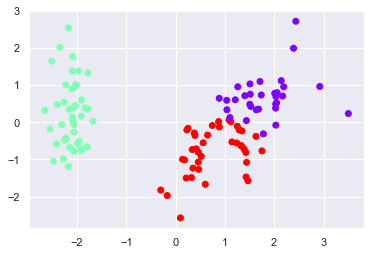

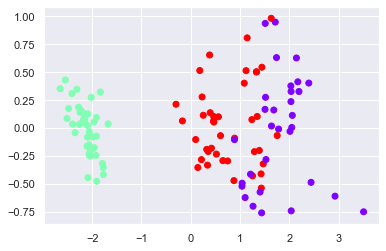

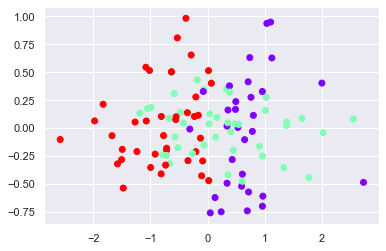

In [231]:
# Solve Here
#using Kmeans, divide the data into different clusters.
kmeans = KMeans(n_clusters=3)  
kmeans.fit(X_train)  
KModel =kmeans.fit(X_train)  
kmeans.cluster_centers_
kmeans.labels_

#Do scatter plot for each two combination of the three dimensions together (0 vs 1), (0 vs 2), (1 vs 2).
#combination of (0 vs 1)
plt.scatter(X_train[:,0],X_train[:,1], c=kmeans.labels_, cmap='rainbow')
plt.show()

#combination of (0 vs 2)
plt.scatter(X_train[:,0],X_train[:,2], c=kmeans.labels_, cmap='rainbow')
plt.show()

#combination of (1 vs 2 )
plt.scatter(X_train[:,1],X_train[:,2], c=kmeans.labels_, cmap='rainbow')
plt.show()


### Supervised-Learning
- Divide your dataset to 80% training and 20% validation
- Build a Logistci regression model for the reduced IRIS dataset
- What is the training accuracy
- What is the validation accuracy
- Form the confusion matrix

C:\Users\lawre\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lawre\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

array([[-2.36853694,  0.77044533, -0.11034141],
       [ 0.46865677, -1.33844016, -1.56796765],
       [ 1.79713198,  0.54334686,  1.88597053]])

0.9325842696629213 is the training accuracy
0.8695652173913043 is the validation accuracy
[[0 4 3]
 [5 3 3]
 [3 0 2]]


Text(89.18, 0.5, 'True Label')

Text(0.5, 12.5, 'Predicted Label')

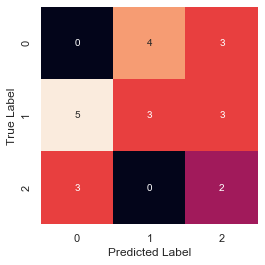

In [239]:
# Solve Here

#step0: Split the data into training and testing data (80%/20%)
x_train2, x_test2, y_train2, y_test2 = train_test_split(X_train, y_train, train_size=0.8 )

#Step1: create the model 
clf = LogisticRegression()

#step2: test your model using training data
clf.fit(x_train2, y_train2)

#step3: test your model using testing data
predicted = logisticRegr.predict(x_test2)
clf.coef_

#What is the training accuracy
print(logisticRegr.score(x_train2, y_train2),'is the training accuracy')

#What is the validation accuracy
print(logisticRegr.score(x_test2,y_test2),'is the validation accuracy')

#Form the confusion matrix
cm = metrics.confusion_matrix(y_test2, predictions)
print(cm)
sns.heatmap(cm,square= True, annot= True,fmt= 'd', cbar= False)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')